<a href="https://colab.research.google.com/github/tobias-hoepfl/Digital-Organizations-SE/blob/main/learning_portfolio/4_bank_churn_Hoepfl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Learning Portfolio - Predict if a customer will leave the bank



**Goal:**

Predict if a customer will leave the bank (called bank churning) based on information on the customer

<br>

**Method:**

Apply the methods used in the video by fastAI (https://www.kaggle.com/code/jhoward/linear-model-and-neural-net-from-scratch) and build a neural network from scratch. The implementation of the neural network is commented which helped me understand the code.

<br>

**Source of the data set:**

https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling

<br>

**Description on Kaggle:**

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.
Acknowledgements

Big thanks to https://www.superdatascience.com/pages/deep-learning

## Preparation and preprocessing

In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv("/content/drive/MyDrive/DigitalOrganizations/LearningPortfolio1/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isna().sum()
#there are no na values which have to be removed

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
import numpy as np
df.describe(include=(np.number))
#Look at some basic statistics of numerical features
#There are no values that seem unplausibel at first sight making it necessary to clean up the data
#Row number and CustomerId are probably useless and can be removed

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
import numpy as np
df.describe(include=(np.object))
#Do the same for textual features
#Surname can probably be removed

<ipython-input-6-210515620ed0>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=(np.object))


,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [7]:
#Drop the three columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

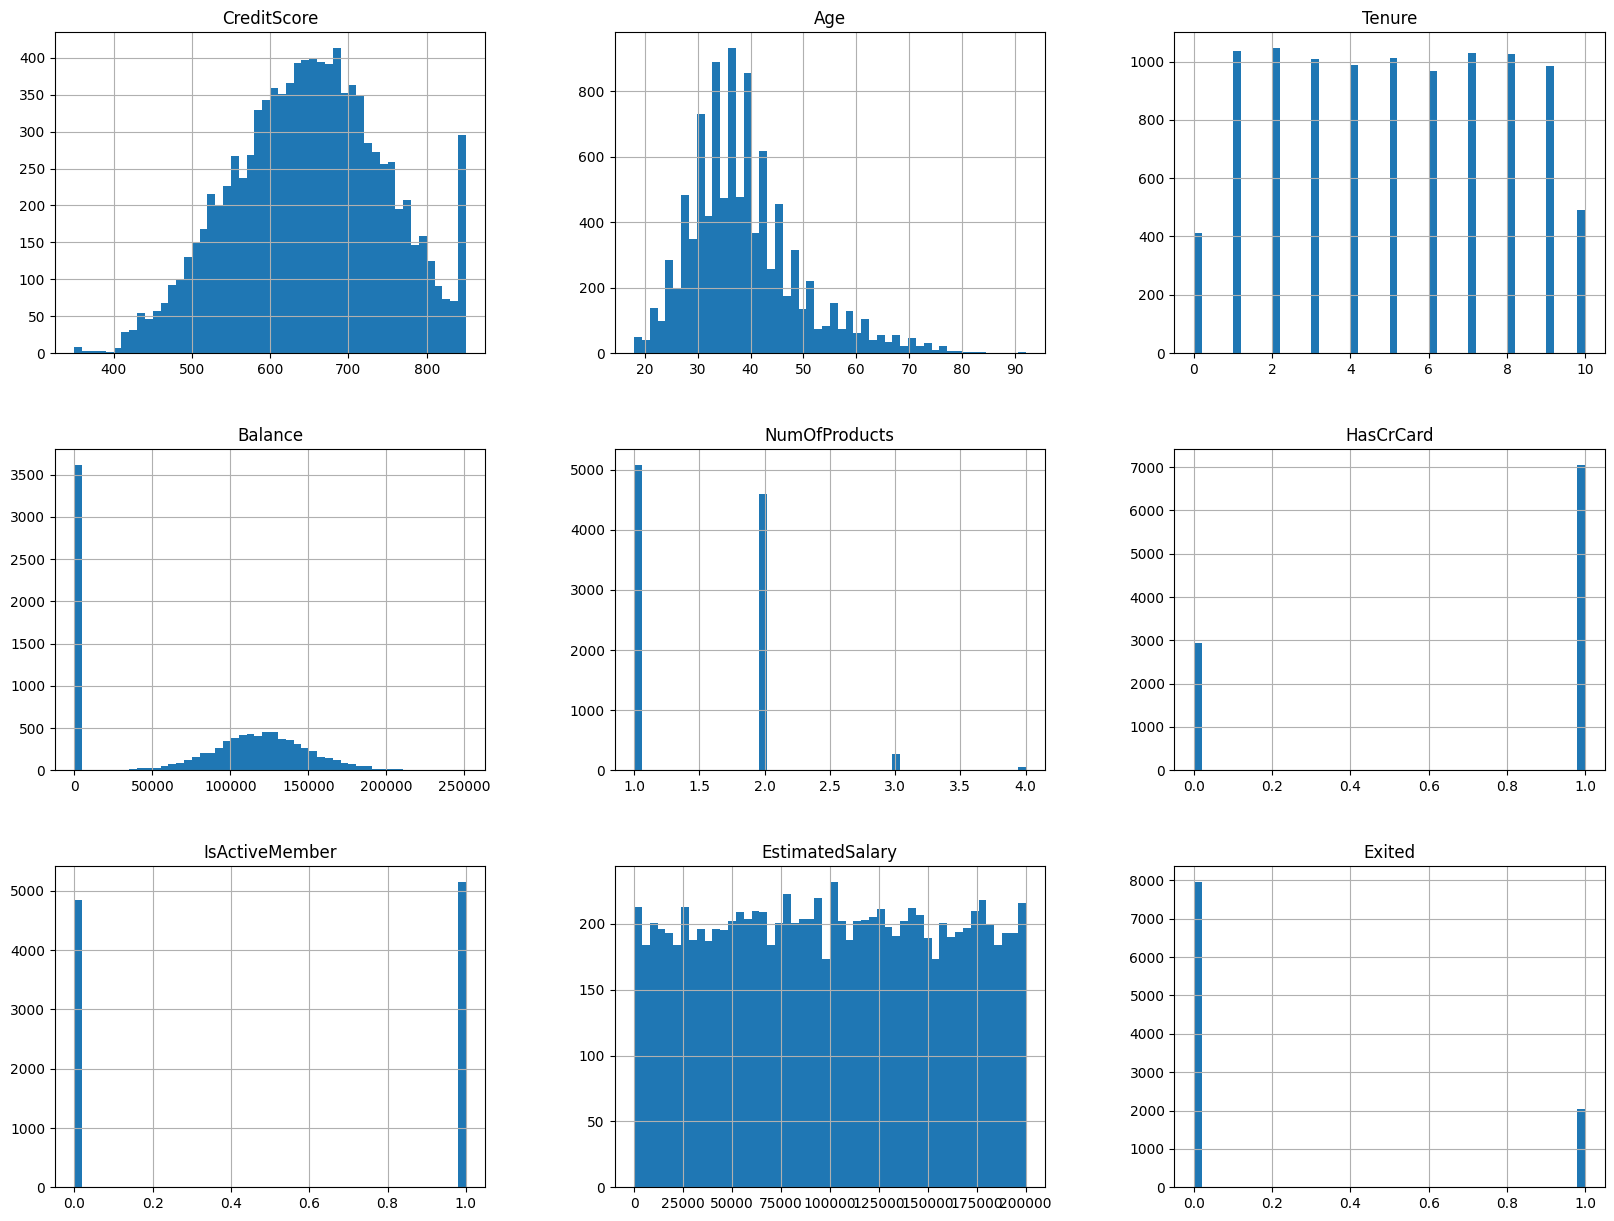

In [8]:
#Check if some features need to be logarithmized
df.hist(bins=50, figsize=(20, 15))
#Interpretation:
#Age has got a classical long tail distribution
#Balance shows a weird pattern with a lot of values around 0, very few until 50000 and then a peak again at about 125000 

In [9]:
#logarithmize age and balance

#add 1 to the balance because the balance can be 0 (where no logarithm is defined)
df['LogBalance'] = np.log(df['Balance']+1)

df['LogAge'] = np.log(df['Age'])

df.drop(['Balance', 'Age'], axis=1)

,CreditScore,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,LogBalance,LogAge
0,619,France,Female,2,1,1,1,101348.88,1,0.000000,3.737670
1,608,Spain,Female,1,1,0,1,112542.58,0,11.336294,3.713572
2,502,France,Female,8,3,1,0,113931.57,1,11.980813,3.737670
3,699,France,Female,1,2,0,0,93826.63,0,0.000000,3.663562
4,850,Spain,Female,2,1,1,1,79084.10,0,11.740155,3.761200
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,5,2,1,0,96270.64,0,0.000000,3.663562
9996,516,France,Male,10,1,1,1,101699.77,0,10.957287,3.555348
9997,709,France,Female,7,1,0,1,42085.58,1,0.000000,3.583519
9998,772,Germany,Male,3,2,1,0,92888.52,1,11.226260,3.737670


<Axes: >

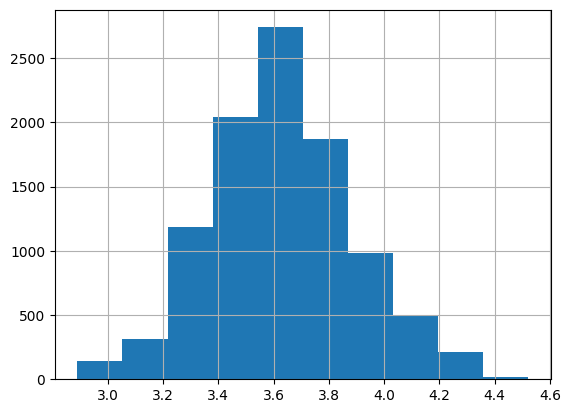

In [10]:
#now distribution is closer to a normal distribution
df.LogAge.hist()

<Axes: >

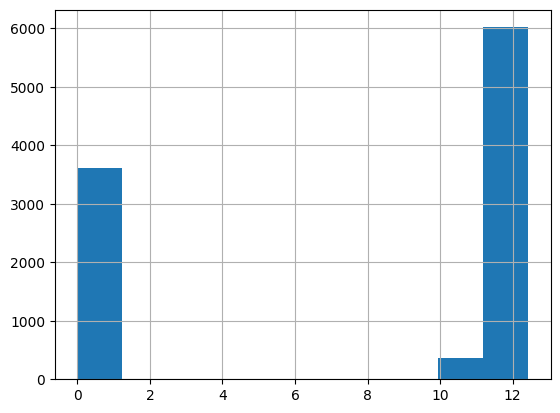

In [11]:
#for the balance it still does not look like a normal distribution at all 
#-> how to deal with it the best? Maybe split the feature in two? But how?
#For now it is kept as it is
df.LogBalance.hist()

In [12]:
#Do one-hot-encoding in pandas for the two remaining textual features
df = pd.get_dummies(df, columns=["Geography","Gender"])
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'LogBalance', 'LogAge',
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [13]:
#the encoding worked as expected
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,LogBalance,LogAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,3.737670,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,11.336294,3.713572,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,11.980813,3.737670,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,3.663562,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,11.740155,3.761200,0,0,1,1,0


In [14]:
import torch

#cast to float
df = df.astype(float)

#extract the feature columns and convert them to a tensor
t_indep = torch.tensor((df.loc[:, df.columns != 'Exited']).values, dtype=torch.float)

#do the same for the label
t_dep = torch.tensor(df['Exited'])

In [15]:
#check the size of the feature tensor
#we have 10000 observation and 15 features
t_indep.shape

torch.Size([10000, 15])

##Neural network

For the neural network from scratch implementation I copied the relevant code parts and adapted them only minorly from https://www.kaggle.com/code/jhoward/linear-model-and-neural-net-from-scratch.

The comments were added by me which helped me to understand better what the code does.

In [16]:
from fastai.data.transforms import RandomSplitter

#Split the data in training and validation set (the alternative would be sklearn)
#In fastai this seems to return a list of indices
trn_split, val_split = RandomSplitter(seed=42)(df)

#the list of indices is now applied to the actual tensors (independent and dependent), so we get two tensors
trn_indep, val_indep = t_indep[trn_split], t_indep[val_split]
trn_dep, val_dep = t_dep[trn_split], t_dep[val_split]

#the default of fastai RandomSplitter seems to be 80/20 which can be seen when looking at the length
len(trn_indep), len(val_indep)

(8000, 2000)

In [17]:
#n_coeff is the number of features again (15 in our case)
n_coeff = t_indep.shape[1]

In [18]:
import torch.nn.functional as F

#calculates the predictions of the model
def calc_preds(coeffs, indeps):
    #coefficients are in this tuple shape which is initialized in the code further below
    l1,l2,const = coeffs
    #@ refers to matrix multiplication, then apply ReLU
    res = F.relu(indeps@l1)
    #for the output layer also add a bias
    res = res@l2 + const
    #apply sigmoid in the end, so the result is between 0 and 1
    return torch.sigmoid(res)

In [19]:
#calculates the loss which is the mean absolute error in our case
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

In [21]:
def one_epoch(coeffs, lr):
    #in an epoch we first calculate the loss
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    #then we calculate the gradients
    loss.backward()
    #We update the coefficients with the function defined before
    with torch.no_grad(): update_coeffs(coeffs, lr)
    #we print out the current loss
    print(f"{loss:.3f}", end="; ")

In [22]:
#for every feature we initialize a random weights and we do the same for the hidden layer
#we substract 0.5 in order to center them at 0

def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    #one bias for the output layer
    const = torch.rand(1)[0]
    #return as a tuple
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [27]:
def train_model(epochs=5, lr=0.01):
    #don't touch the seed for random number
    #I did this and the model could not fit anymore
    #as mentioned in the video, when doing this manually one has to be cautious about parameter initialization
    torch.manual_seed(442)
    #first initialize coefficients
    coeffs = init_coeffs()
    #then performe backpropagation for the number of epochs
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [28]:
#Takes the coefficients at one point in time and updates them using the gradients and the learning rate
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        #sub_ seems to be an internal function that directly subtracts something from the given tensor
        layer.sub_(layer.grad * lr)
        #resets the gradients
        layer.grad.zero_()

In [29]:
coeffs = train_model(lr=1.4)
#after about three epochs we hit a point where no further improvement can be noticed
#so I decrease the number of epochs compared to the Titanic example by fastAI

0.796; 0.296; 0.204; 0.204; 0.204; 

In [30]:
#Calculate the final accuracy in the validation set
def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)
#an accuracy of 79.7 percent is quite good

tensor(0.7970)